# Mapeando el Universo





```
# Tiene formato de código
```

## Introducción

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

Link de informacion de campo: 
https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system

### Instalando dependencias

In [ ]:
!pip install pandas numpy matplotlib seaborn

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

# Utilizar dataset local si existe, sino obtener desde link del mail, data completo.
filename = "data/DiploDatos.csv" if os.path.exists("data/DiploDatos.csv") else "http://iate.oac.uncor.edu/~marioagustin/files/DiploDatos.csv" 

In [4]:
df = pd.read_csv(filename,index_col=0)

In [5]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,...,88.824944,87.177767,89.704905,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,...,105.268848,103.415387,94.336062,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,...,-9999.008000,-9999.008000,-9999.008000,-9999.008000,-10000.210000,0.012519,0.009755,0.006748,0.005015,0.003730
25%,0.073795,0.000012,0.000000,87.723450,9.822191,145.630565,6.390797,0.006289,0.006177,19.136530,...,44.234690,44.168518,46.827190,47.551773,48.464130,0.079351,0.061830,0.042773,0.031785,0.023642
50%,0.115355,0.000021,0.000000,142.108400,13.798750,183.556438,21.064065,0.010219,0.010032,19.879295,...,89.455345,86.580405,90.902935,90.660525,89.476295,0.118164,0.092072,0.063695,0.047332,0.035207
75%,0.175229,0.000035,0.000000,202.606025,21.750100,221.970898,37.825780,0.019530,0.019184,20.718253,...,135.113725,131.679025,133.857725,132.924200,130.529275,0.176289,0.137363,0.095027,0.070615,0.052525
max,1.002166,635.625600,148.000000,850.000000,2262.742000,359.997922,71.767356,84.120962,80.475913,31.771320,...,259.462600,257.487200,257.923900,258.219200,257.719100,28.182430,21.959560,15.191520,11.288930,8.396889


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente ha votado si se corresponde con una galaxia espiral, elíptica o irregular.

In [6]:
filename = 'data/DiploDatos_Zoo.csv'

In [7]:
zoo = pd.read_csv(filename,index_col=0)

In [8]:
zoo.describe() #Visualizamos el 2do dataset para ver su contenido

,spiral,elliptical,uncertain
count,621957.000000,621957.000000,621957.000000
mean,0.286160,0.093688,0.620152
std,0.451965,0.291395,0.485349
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [9]:
zoo.dtypes

spiral        int64
elliptical    int64
uncertain     int64
dtype: object

In [10]:
dd = df.join(zoo) #Total de 117 columnas uniendo todo

In [11]:
#filling Nan's with 0's in galaxy type variable (esto sugirió el profe) (lo puse acá porque no están en el nuevo_data)
for col in ['spiral','elliptical','uncertain']:
    dd[col] = dd[col].fillna(0)
    #check 
    print(dd[col].isna().sum())

0
0
0


In [12]:
dd.dtypes # debemos volver a transformar las variables del conjunto set en variables categóricas 
          # (esto me pasaba en mi notebook, así que los tuve que volver a transformar)

z               float64
zErr            float64
zWarning          int64
subClass         object
velDisp         float64
                 ...   
extinction_i    float64
extinction_z    float64
spiral          float64
elliptical      float64
uncertain       float64
Length: 118, dtype: object

In [13]:
for col in ['spiral','elliptical','uncertain']:
    dd[col] = dd[col].apply(np.int64)
    #check 
    print(dd[col].dtypes)

int64
int64
int64


In [14]:
dd.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,...,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125,0.205979,0.067437,0.446388
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,...,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430,0.404415,0.250778,0.497118
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,...,-9999.008000,-10000.210000,0.012519,0.009755,0.006748,0.005015,0.003730,0.000000,0.000000,0.000000
25%,0.073795,0.000012,0.000000,87.723450,9.822191,145.630565,6.390797,0.006289,0.006177,19.136530,...,47.551773,48.464130,0.079351,0.061830,0.042773,0.031785,0.023642,0.000000,0.000000,0.000000
50%,0.115355,0.000021,0.000000,142.108400,13.798750,183.556438,21.064065,0.010219,0.010032,19.879295,...,90.660525,89.476295,0.118164,0.092072,0.063695,0.047332,0.035207,0.000000,0.000000,0.000000
75%,0.175229,0.000035,0.000000,202.606025,21.750100,221.970898,37.825780,0.019530,0.019184,20.718253,...,132.924200,130.529275,0.176289,0.137363,0.095027,0.070615,0.052525,0.000000,0.000000,1.000000
max,1.002166,635.625600,148.000000,850.000000,2262.742000,359.997922,71.767356,84.120962,80.475913,31.771320,...,258.219200,257.719100,28.182430,21.959560,15.191520,11.288930,8.396889,1.000000,1.000000,1.000000


In [15]:
dd

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0,0,1
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0,0,1
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1,0,0
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0,1,0
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,96.269780,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,NaN,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,...,24.327620,25.63022,0.116248,0.090580,0.062663,0.046565,0.034636,0,0,1
957077357326264320,0.084226,0.000017,0,STARFORMING,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,...,89.509990,89.86601,0.131573,0.102520,0.070923,0.052704,0.039202,1,0,0
957066637087893504,0.141610,0.000030,0,NaN,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,...,121.233000,115.68470,0.139073,0.108365,0.074966,0.055708,0.041437,1,0,0


## 1. Exploración y análisis general de los datos

1.1 Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
1.2 Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

Tenemos 5 mil identificaciones , descritos en 118 columnas, 114 del 1er dataframe y 3 del segundo. 

A continuacion, se muestran las variables, tipo y significado:


Considerando el objetivo pricipal de la mentoría que es 

---

determinar el corrimiento al rojo (redshift) de galaxias 
a partir de datos fotométricos, las columnas que mas importan son separadas en un nuevo dataset. 
Con el desarrollo del trabajo se vera si es necasario sumar alguna nueva variable al conjunto elegido.

In [16]:
# Viendo la cantidad de variables
print("Hay ", dd.shape[0], "filas y ", dd.shape[1], "columnas. Es decir, hay ", dd.shape[0], "datasamples y ",dd.shape[1], "variables")
print(dd.columns)

Hay  864064 filas y  118 columnas. Es decir, hay  864064 datasamples y  118 variables
Index(['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr', 'ra',
       'dec', 'raErr', 'decErr',
       ...
       'expPhi_i', 'expPhi_z', 'extinction_u', 'extinction_g', 'extinction_r',
       'extinction_i', 'extinction_z', 'spiral', 'elliptical', 'uncertain'],
      dtype='object', length=118)


In [17]:
#Seleccionamos las columnas importantes. 
important_cols = ['z', 'velDisp', 'ra', 'dec', 'modelMag_u', 'modelMag_g',	'modelMag_r',	'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',	'petroMag_r', 'petroMag_i',	'petroMag_z']#, 'spiral', 'elliptical', 'uncertain']

In [18]:
nuevo_data= dd[important_cols] #Armamos un nuevo dataset y lo visualizamos.
nuevo_data

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
specObjID,,,,,,,,,,,,,,
957075158303008768,0.012095,60.39996,197.448850,4.249896,18.10708,17.34184,17.08753,16.99253,16.87547,18.57100,17.78100,17.42263,17.27120,17.16873
957066087332079616,0.141718,217.80020,197.458925,4.451149,19.56142,17.60611,16.52897,16.07807,15.72277,19.88646,17.76745,16.73393,16.30344,16.02492
957065537576265728,0.140137,138.90830,197.473340,4.417710,19.56201,18.19559,17.34286,16.92395,16.61079,19.36260,18.28985,17.52255,17.16107,16.93806
957066911965800448,0.066672,241.28300,197.583262,4.300230,18.38973,16.40218,15.47812,15.05008,14.72299,18.41023,16.50541,15.56535,15.15269,14.88429
957067186843707392,0.183667,118.87630,197.601252,4.397977,19.44434,18.39804,17.81157,17.45442,17.30775,19.48579,18.44195,17.85830,17.51298,17.52050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,181.48450,197.172038,4.453705,20.00012,18.02587,16.99366,16.55089,16.24613,19.22691,17.99846,17.06767,16.65787,16.60437
957077357326264320,0.084226,43.81417,197.333650,4.462605,19.42239,17.90961,17.23364,16.85341,16.60565,19.38062,17.86405,17.24969,16.86956,16.69647
957066637087893504,0.141610,194.91520,197.386425,4.364000,20.68069,18.52292,17.42307,16.97244,16.64187,20.63907,18.34949,17.38783,16.97025,16.71950


In [19]:
print ("TIPOS DE DATOS:")
nuevo_data.dtypes #Visualizamos los tipos de datos que tenemos en el conjunto elegido.

TIPOS DE DATOS:


z             float64
velDisp       float64
ra            float64
dec           float64
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroMag_u    float64
petroMag_g    float64
petroMag_r    float64
petroMag_i    float64
petroMag_z    float64
dtype: object

In [20]:
#imprimimos la cantidad de valores faltantes para cada variable
nuevo_data.isna().sum()

z             0
velDisp       0
ra            0
dec           0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [25]:
#Exploramos los valores minimos y maximos
print ( "A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:")
for col_name in important_cols:
    print ('{: <25}'.format(col_name.upper()),
           "MIN = {:6.2f}".format(nuevo_data[col_name].min())," ",
           "MAX = {:6.2f}".format(nuevo_data[col_name].max())," "
          )

A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:
Z                         MIN =  -0.01   MAX =   1.00  
VELDISP                   MIN =   0.00   MAX = 850.00  
RA                        MIN =   0.00   MAX = 360.00  
DEC                       MIN = -11.25   MAX =  71.77  
MODELMAG_U                MIN = -9999.00   MAX =  31.77  
MODELMAG_G                MIN = -9999.00   MAX =  32.30  
MODELMAG_R                MIN = -9999.00   MAX =  33.85  
MODELMAG_I                MIN = -9999.00   MAX =  32.10  
MODELMAG_Z                MIN = -9999.00   MAX =  29.18  
PETROMAG_U                MIN = -9999.00   MAX =  41.27  
PETROMAG_G                MIN = -9999.00   MAX =  36.99  
PETROMAG_R                MIN = -9999.00   MAX =  37.20  
PETROMAG_I                MIN = -9999.00   MAX =  37.01  
PETROMAG_Z                MIN = -9999.00   MAX =  37.49  


## 2. Análisis estadístico

2.1. Es la distribución de galaxia uniforme sobre la bóveda celeste?

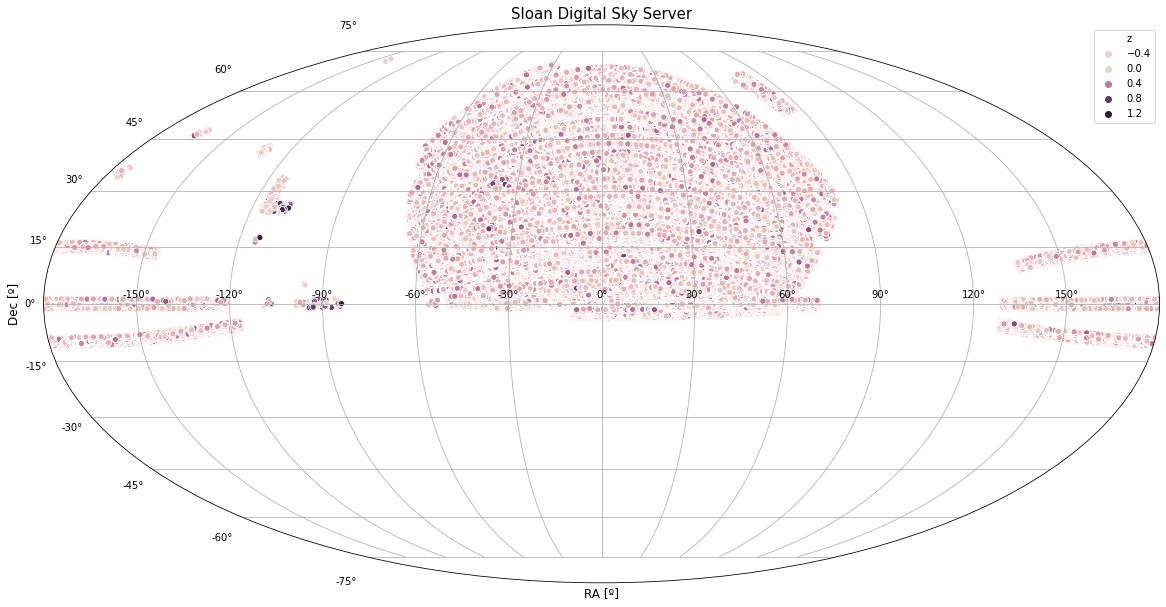

In [26]:
f = plt.figure(figsize=(20,15))
ax = f.add_subplot(111,projection="mollweide")

sns.scatterplot(x=np.radians(dd['ra'])-np.pi,y=np.radians(dd['dec']),data=dd,hue='z',ax=ax)
plt.grid(True)

ax.set_title('Sloan Digital Sky Server')
ax.title.set_fontsize(15)
ax.set_xlabel("RA [º]")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec [º]")
ax.yaxis.label.set_fontsize(12)

plt.show()

Considerando el grafico y que: 

"Data Release 16 is the fourth data release of the fourth phase of the Sloan Digital Sky Survey. It includes SDSS data taken through August 2018, and *encompasses more than one-third of the entire celestial sphere*." - (obtenido de: https://www.sdss.org/dr16/scope/ )

La distribucion dada por el dataset no sera uniforme debido a que el dataset no comprente datos de toda la bobeda celeste.

---
2.2 Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [27]:
#rebanda=nuevo_data[nuevo_data.ra > 150][nuevo_data.ra < 200]
rebanada=nuevo_data[(dd.ra > 150) & (nuevo_data.ra < 200) & (nuevo_data.dec>60)]

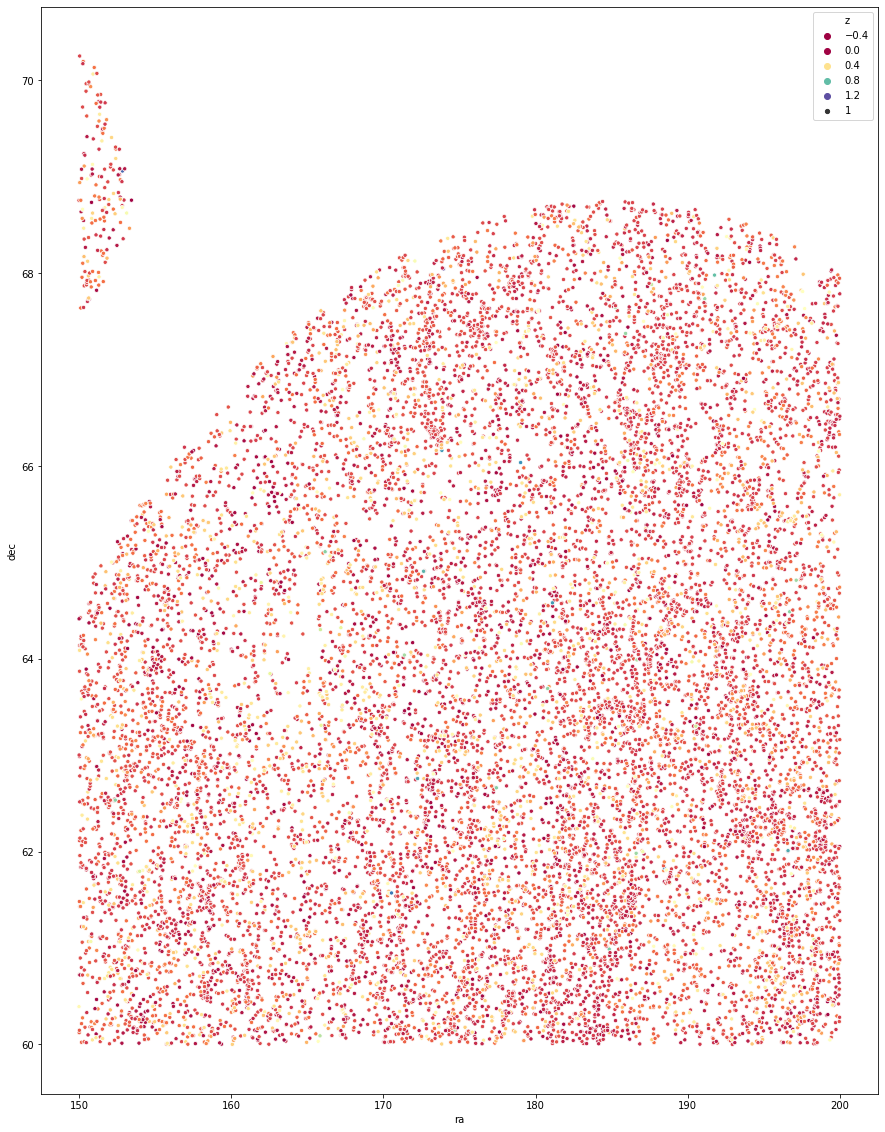

In [28]:
plt.figure(figsize=(15,20)) #Gráfico de la rebanada
sns.scatterplot(data=rebanada, x='ra', y='dec', hue='z', size=1, palette='Spectral')

---
2.3. Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

Tomaremos las bandas "ModelMag"

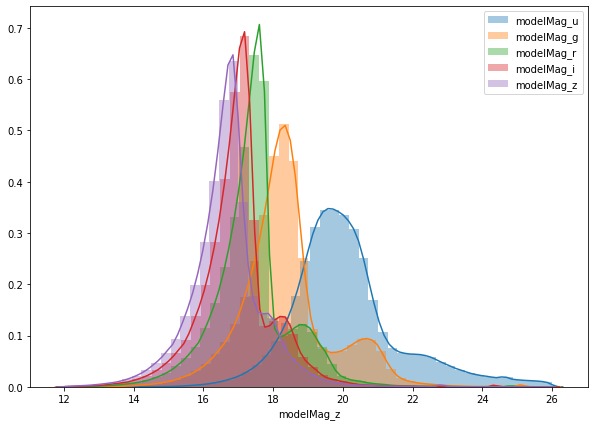

- ks entre modelMag_u y modelMag_g: KstestResult(statistic=0.5824331712093418, pvalue=0.0)
- ks entre modelMag_u y modelMag_r: KstestResult(statistic=0.7529812208030207, pvalue=0.0)
- ks entre modelMag_u y modelMag_i: KstestResult(statistic=0.820507168732308, pvalue=0.0)
- ks entre modelMag_u y modelMag_z: KstestResult(statistic=0.8603943043255079, pvalue=0.0)
- ks entre modelMag_g y modelMag_r: KstestResult(statistic=0.46678157616891824, pvalue=0.0)
- ks entre modelMag_g y modelMag_i: KstestResult(statistic=0.5929084361015116, pvalue=0.0)
- ks entre modelMag_g y modelMag_z: KstestResult(statistic=0.6464591230656989, pvalue=0.0)
- ks entre modelMag_r y modelMag_i: KstestResult(statistic=0.2808072017820331, pvalue=0.0)
- ks entre modelMag_r y modelMag_z: KstestResult(statistic=0.40999445378855753, pvalue=0.0)
- ks entre modelMag_i y modelMag_z: KstestResult(statistic=0.19753478981020278, pvalue=0.0)


In [35]:
from scipy.stats import ks_2samp
import itertools


plt.figure(figsize=(10,7))
# Graficar a partir de filtrar df

bands = ['modelMag_u',
        'modelMag_g',
        'modelMag_r',
        'modelMag_i',
        'modelMag_z']

for band in bands:
    sns.distplot(dd[(dd[band] < 26) & (dd[band] > 12)][band],label=band,norm_hist=True)

plt.legend()
plt.show()

# Test de Kolmogorov-Smirnov entre dist
for pair in list(itertools.combinations(bands, 2)):
    corr = ks_2samp(dd[(dd[pair[0]] < 26) & (dd[pair[0]] > 12)][pair[0]],dd[(dd[pair[1]] < 26) & (dd[pair[1]] > 12)][pair[1]])
    print('- ks entre {} y {}: {}'.format(pair[0], pair[1],corr))

Las bandas tienen una distribucion muy similar entre ellas. Asimilan una distribucion normal.

---
2.4. Cuál es la distribución del corrimiento al rojo de las galaxias?

- Media de z: 0.14666537576080943, media de z sin valores mayor a 0.3: 0.1130394902557891


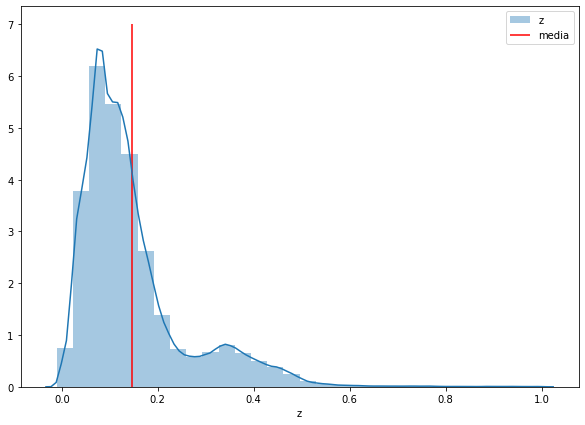

In [34]:
plt.figure(figsize=(10,7)) # Gráfico de la densidad, distribución. 

media_completa = dd.z.mean()
media_en_rango = dd[(dd.z < 0.3)].z.mean()

print('- Media de z: {}, media de z sin valores mayor a 0.3: {}'.format(media_completa,media_en_rango))

n=30
sns.distplot(dd.z, kde=True, bins=n, label='z')
plt.vlines(media_completa,0.0,7.0,'r',label='media')

# Calcular media
plt.legend()

La distribucion de 'Z' asimila una distribucion de forma **normal**. La media no coincide con el pico del grafico muy probablemente por los valores outliers de 'Z' cerca de 0.30

---
2.5 Existe correlación entre las diferentes variables?

Calculamos los coeficientes de Correlación de Spearman, (Pearson solo se usa si hay distribucion normal) 
y mostramos los resultados en una matriz. 
Cuanto más cercano a +-1 es el valor, mayor correlación hay 
y cuanto más cercano a cero el valor, menor correlación entre las variables hay

In [35]:
corr=nuevo_data.corr(method="spearman").round(2)
corr

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
z,1.00,0.64,-0.05,-0.04,0.78,0.77,0.62,0.55,0.50,0.73,0.77,0.63,0.57,0.51
velDisp,0.64,1.00,-0.01,0.03,0.55,0.40,0.17,0.10,0.03,0.51,0.41,0.19,0.11,0.04
ra,-0.05,-0.01,1.00,0.04,-0.05,-0.06,-0.07,-0.07,-0.07,-0.05,-0.06,-0.07,-0.07,-0.07
dec,-0.04,0.03,0.04,1.00,-0.11,-0.13,-0.14,-0.14,-0.14,-0.11,-0.13,-0.15,-0.14,-0.14
modelMag_u,0.78,0.55,-0.05,-0.11,1.00,0.93,0.79,0.73,0.66,0.96,0.93,0.80,0.73,0.66
modelMag_g,0.77,0.40,-0.06,-0.13,0.93,1.00,0.94,0.89,0.84,0.89,0.99,0.94,0.89,0.84
modelMag_r,0.62,0.17,-0.07,-0.14,0.79,0.94,1.00,0.99,0.97,0.75,0.92,0.99,0.98,0.95
modelMag_i,0.55,0.10,-0.07,-0.14,0.73,0.89,0.99,1.00,0.99,0.70,0.87,0.97,0.99,0.97
modelMag_z,0.50,0.03,-0.07,-0.14,0.66,0.84,0.97,0.99,1.00,0.64,0.82,0.95,0.97,0.98
petroMag_u,0.73,0.51,-0.05,-0.11,0.96,0.89,0.75,0.70,0.64,1.00,0.90,0.77,0.71,0.64


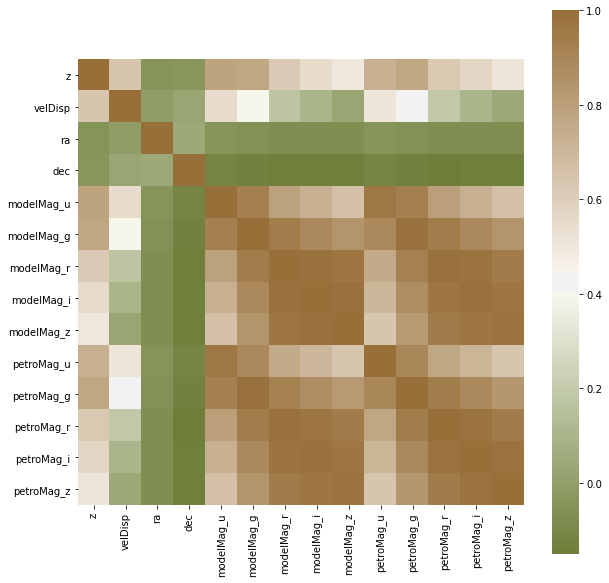

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            cmap=sns.diverging_palette(100, 50, as_cmap=True), #probar colores y s,l.
            square=True)

2.6 Realicen gráficos boxplot para identificar outliers. (Se podrian hacer subplot de todos los boxplots)

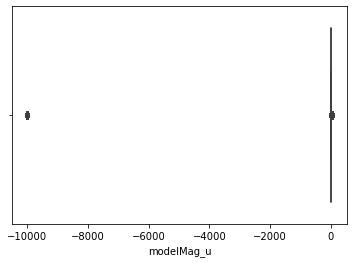

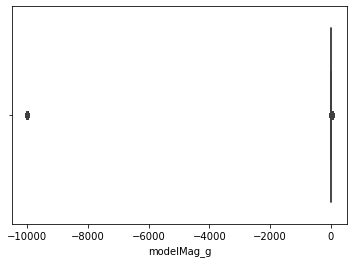

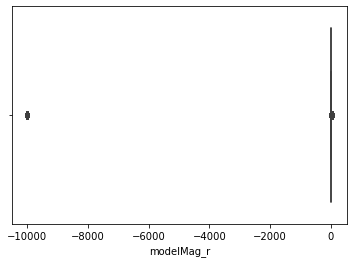

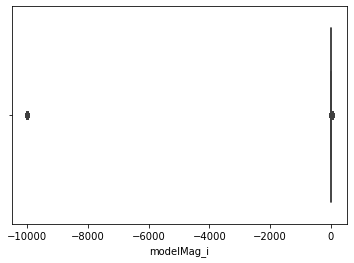

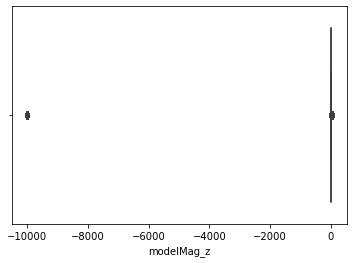

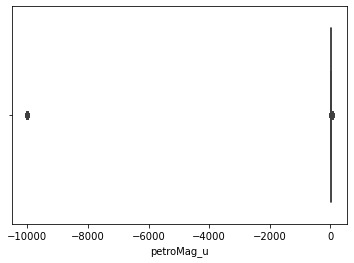

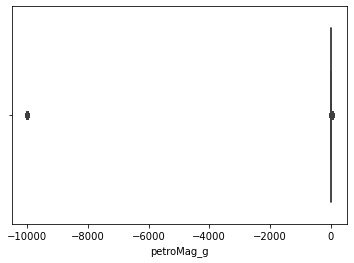

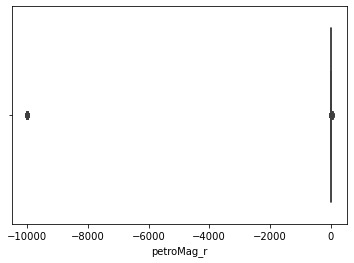

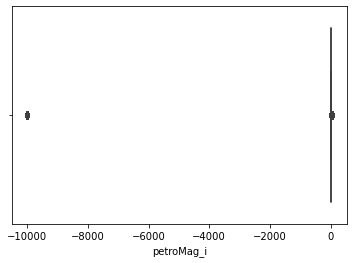

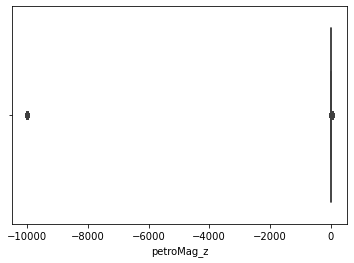

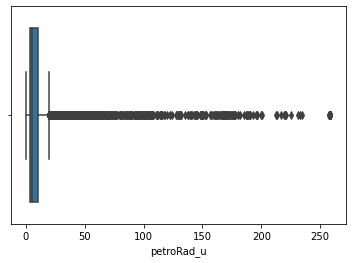

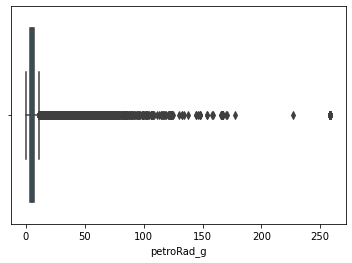

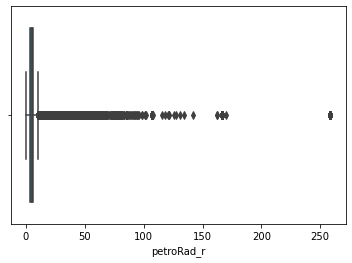

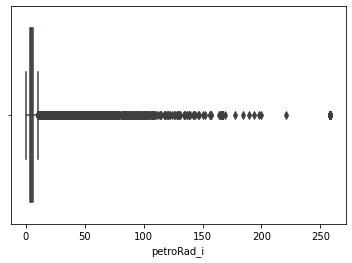

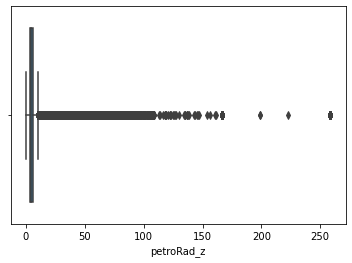

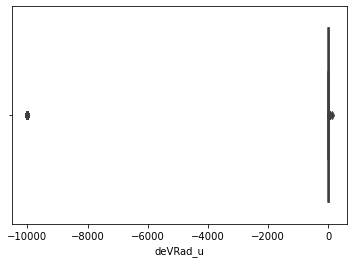

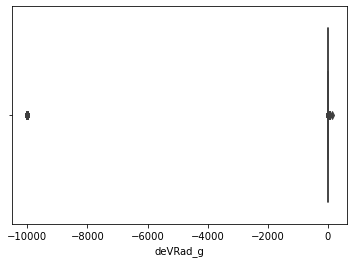

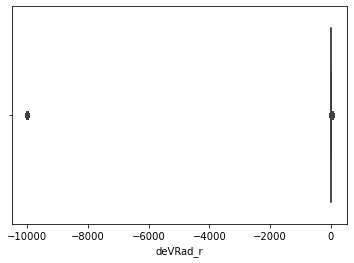

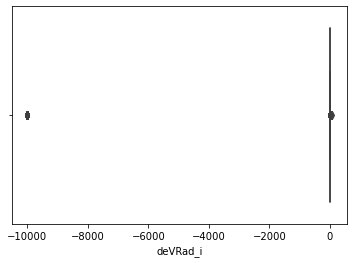

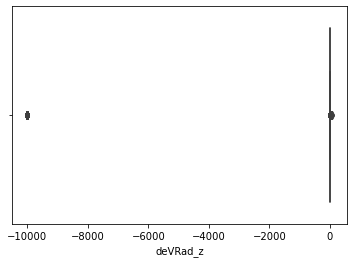

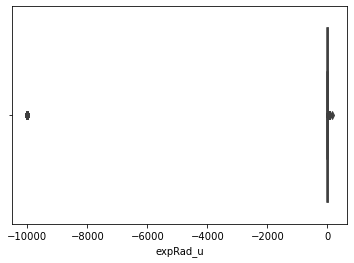

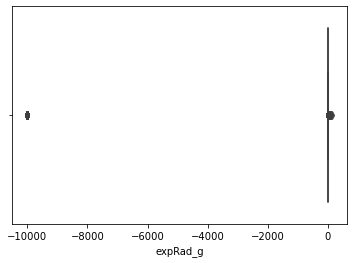

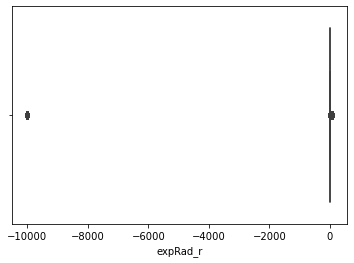

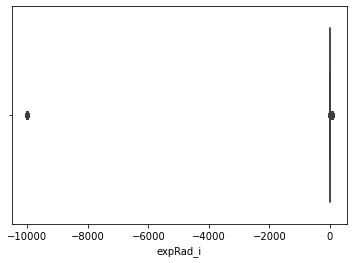

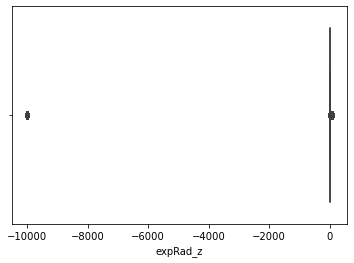

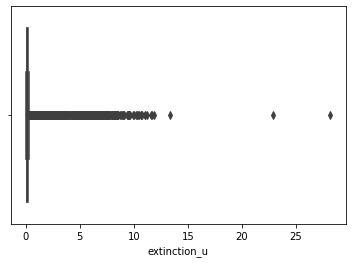

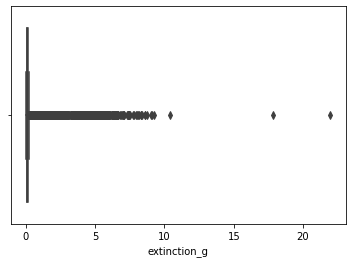

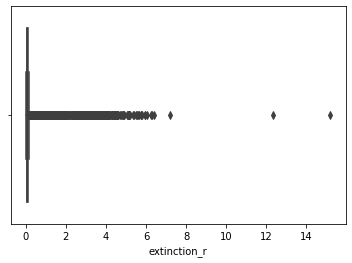

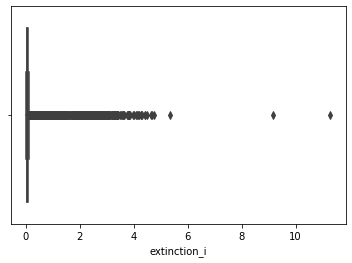

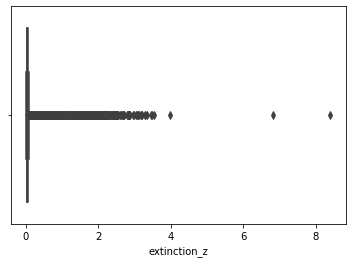

In [37]:
for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            sns.boxplot(x=dd[column], data=dd)
            plt.show()
            
#Ver que variaciones son las que influyen en el z redshift

Hay valores de outliers muy lejanos a los demás outliers, lo que dificultan la interpretración del gráfico. Estos valores serán removidos para mejor visualización

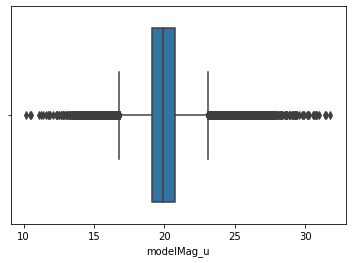

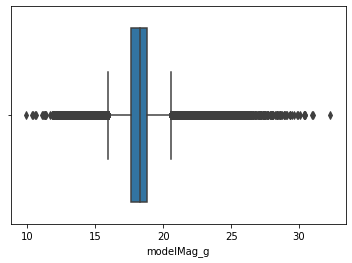

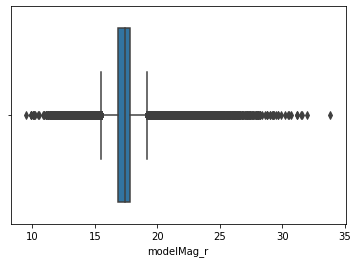

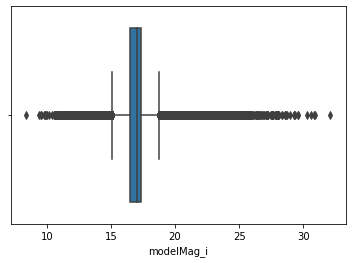

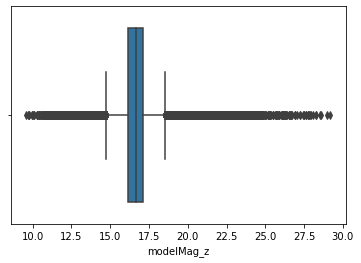

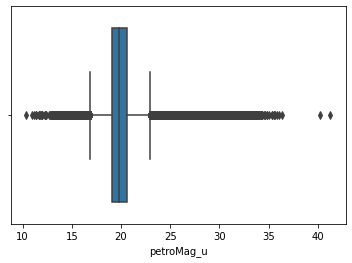

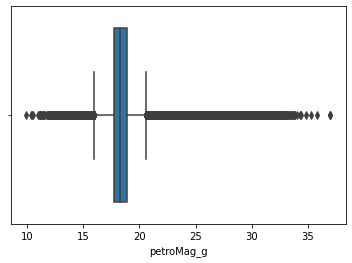

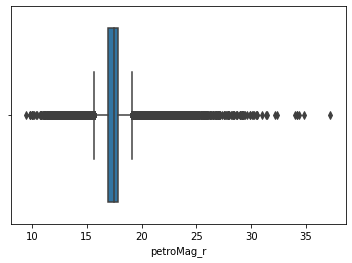

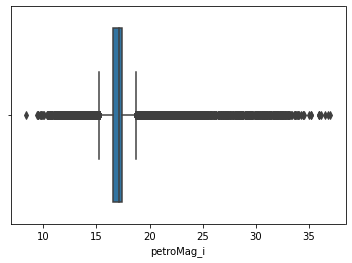

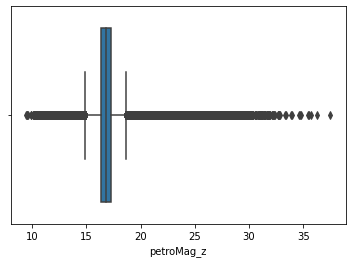

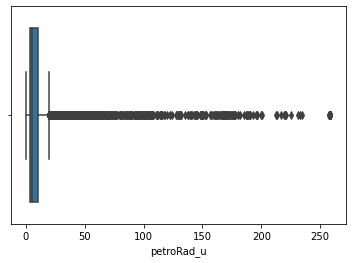

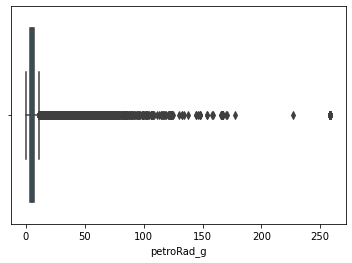

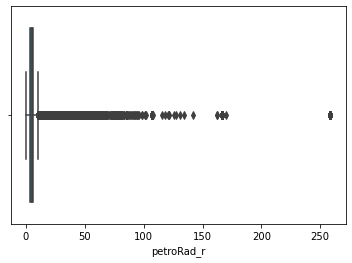

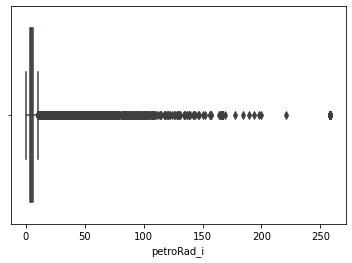

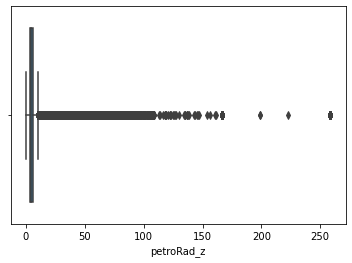

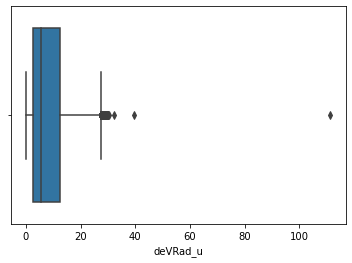

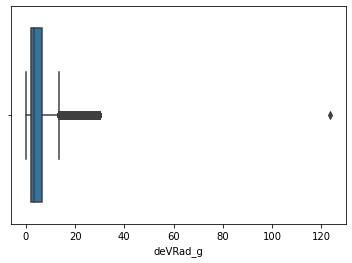

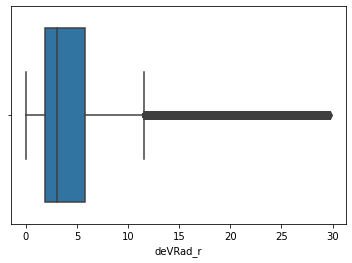

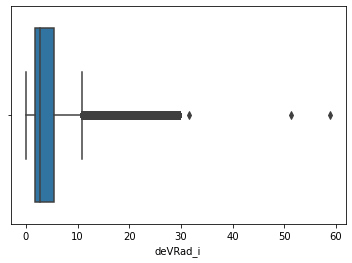

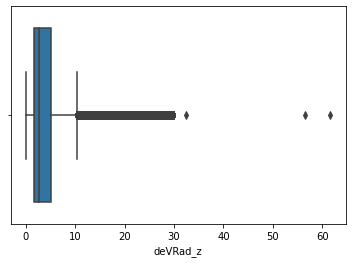

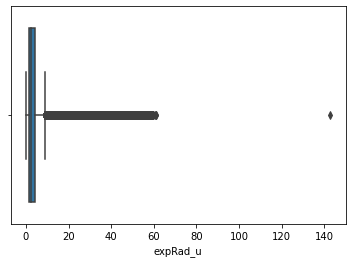

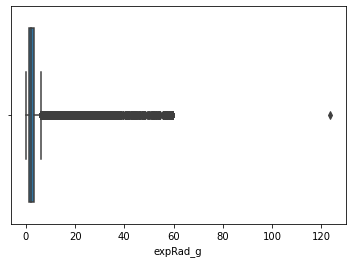

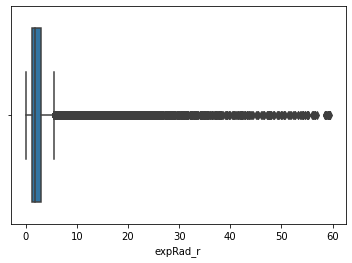

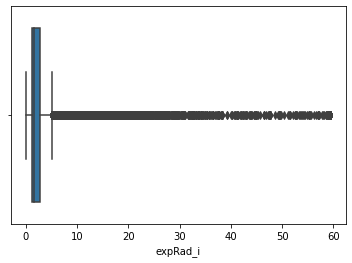

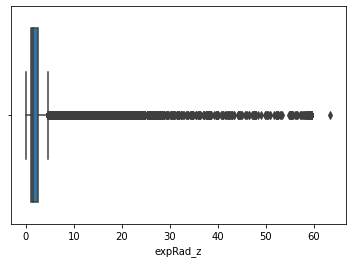

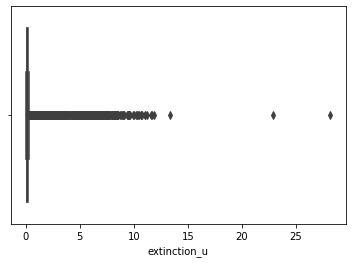

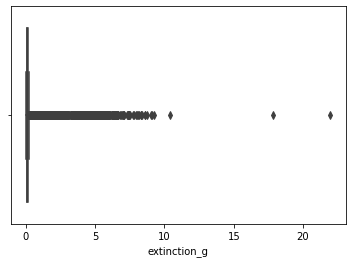

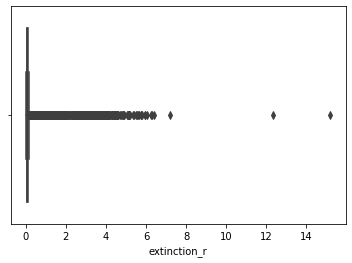

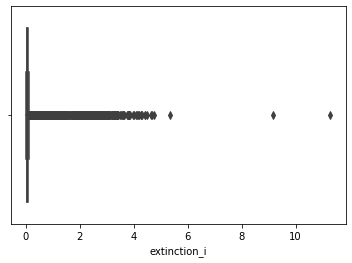

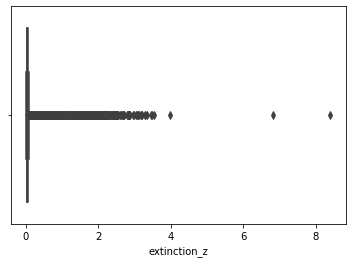

In [38]:
for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            dd= dd[dd[column] >= 0]
            sns.boxplot(x=dd[column], data=dd)
            plt.show()

Todos las magnitudes y radios presentan outliers muy lejanos a los valores máximos y mínimos correspondientes


2.7 Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

Se crea una nueva columna en dd para tener la morfología de cada medición. Como solo tenemos 5000 valores con morofología, los demás sin mediciones se clasificarán en 'Non classified'


In [39]:
dd['morphology'] = np.where(dd.spiral == 1, 'spiral', 'Non classified')
dd['morphology'] = np.where(dd.elliptical == 1, 'elliptical', dd['morphology'])
dd['morphology'] = np.where(dd.uncertain == 1, 'uncertain', dd['morphology'])

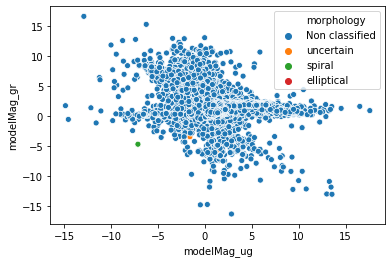

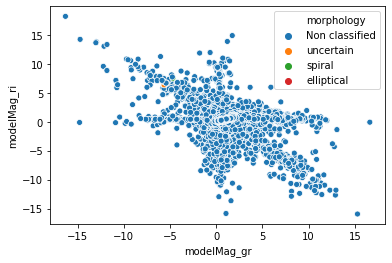

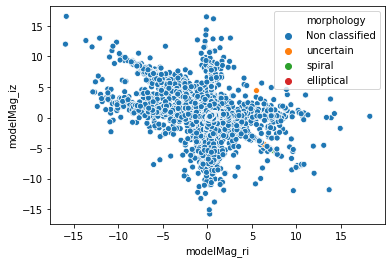

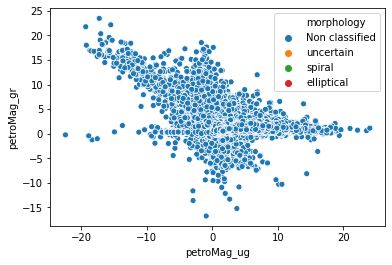

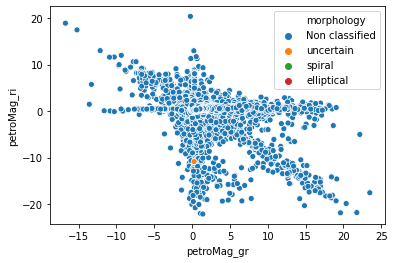

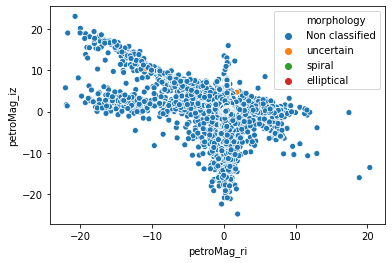

In [40]:
for column in dd.columns:
    if ('petroMag_u' in column) or ('modelMag_u' in column):
        if 'Err' not in column:
            col_name= column.split('_')[0]
            ug= dd[column] - dd['{}_g'.format(col_name)]
            gr= dd['{}_g'.format(col_name)] - dd['{}_r'.format(col_name)]
            ri= dd['{}_r'.format(col_name)] - dd['{}_i'.format(col_name)]
            iz= dd['{}_i'.format(col_name)] - dd['{}_z'.format(col_name)]

            sns.scatterplot(x= ug, y= gr, hue= dd.morphology).set(xlabel= col_name+'_ug' , ylabel=col_name+'_gr')
            plt.show()
            sns.scatterplot(x= gr, y= ri, hue= dd.morphology).set(xlabel= col_name+'_gr' , ylabel=col_name+'_ri')
            plt.show()
            sns.scatterplot(x= ri, y= iz, hue= dd.morphology).set(xlabel= col_name+'_ri' , ylabel=col_name+'_iz')
            plt.show()


La gran cantidad de registros sin una clasificación morfológica serán removidos en un nuevo dataframe para permitir una mejor interpretación de los gráficos

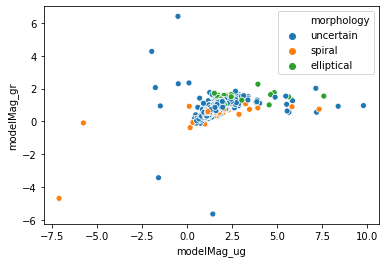

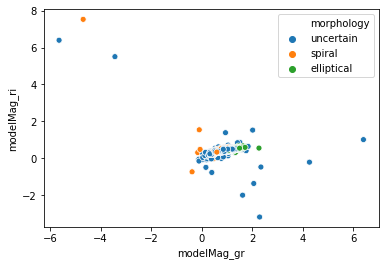

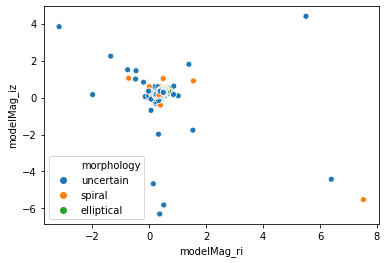

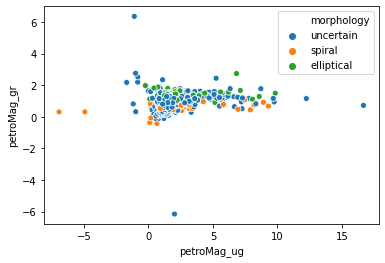

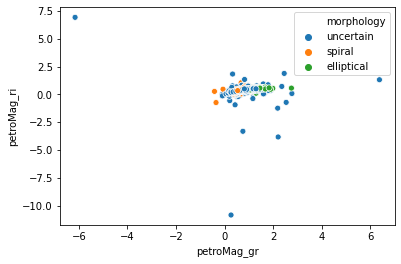

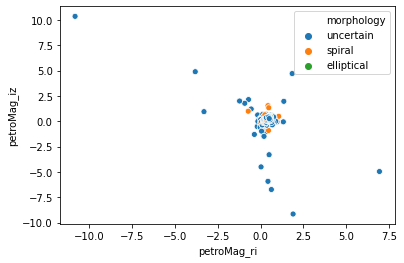

In [44]:
dd_morphology= dd.copy()
dd_morphology= dd_morphology[dd_morphology.morphology != 'Non classified']

for column in dd_morphology.columns:
    if ('petroMag_u' in column) or ('modelMag_u' in column):
        if 'Err' not in column:
            col_name= column.split('_')[0]
            dd_morphology['{}_ug'.format(col_name)]= dd_morphology['{}_u'.format(col_name)] - dd_morphology['{}_g'.format(col_name)]
            dd_morphology['{}_gr'.format(col_name)]= dd_morphology['{}_g'.format(col_name)] - dd_morphology['{}_r'.format(col_name)]
            dd_morphology['{}_ri'.format(col_name)]= dd_morphology['{}_r'.format(col_name)] - dd_morphology['{}_i'.format(col_name)]
            dd_morphology['{}_iz'.format(col_name)]= dd_morphology['{}_i'.format(col_name)] - dd_morphology['{}_z'.format(col_name)]

            sns.scatterplot(x= dd_morphology['{}_ug'.format(col_name)], y= dd_morphology['{}_gr'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_ug' , ylabel=col_name+'_gr')
            plt.show()          
            sns.scatterplot(x= dd_morphology['{}_gr'.format(col_name)], y= dd_morphology['{}_ri'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_gr' , ylabel=col_name+'_ri')
            plt.show()
            sns.scatterplot(x= dd_morphology['{}_ri'.format(col_name)], y= dd_morphology['{}_iz'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_ri' , ylabel=col_name+'_iz')
            plt.show()


En su mayoría predomina la morfología del tipo 'Uncertain', lo que sea que sea difícil definir una relación con respecto a los índices de colores

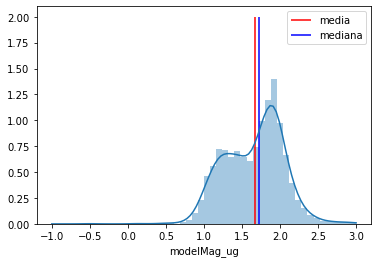

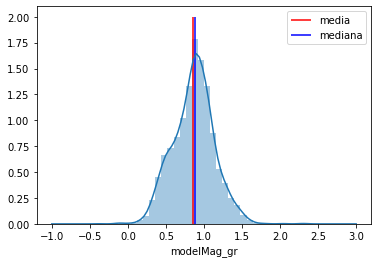

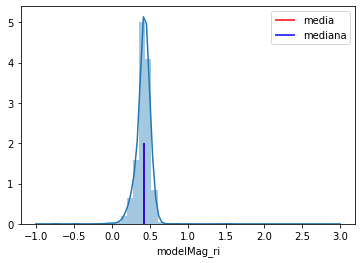

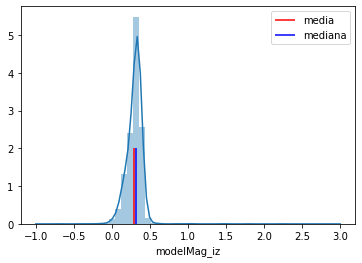

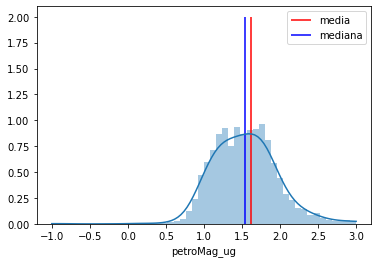

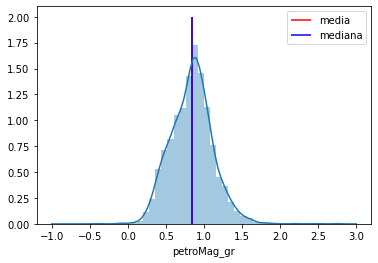

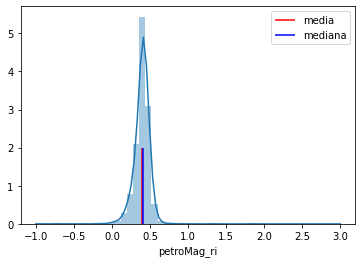

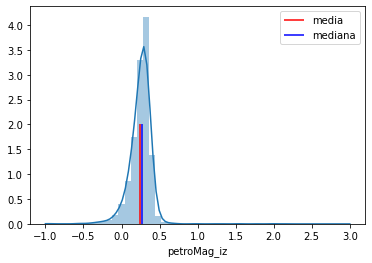

In [45]:
columns_color_list= []
for column in dd_morphology.columns:
    if ('_ug' in column) or ('_gr' in column) or ('_ri' in column) or ('_iz' in column):
        columns_color_list.append(column)

for column in columns_color_list:
    col_name= column.split('_')[0]

    range = [-1,3.0]
    sns.distplot(dd_morphology[column],kde_kws={'clip':range},hist_kws={'range':range})

    plt.vlines(dd_morphology[column].mean(),0.0,2.0,'r',label='media')
    plt.vlines(dd_morphology[column].median(),0.0,2.0,'b',label='mediana')
    plt.legend()
    plt.show()

Como se puede apreciar, 'modelMag_ug' es la única que presenta una distribución bimodal, con su media y mediana exactamente al medio entre las 2 modas. Todas las demás cumplen una clara distribución normal, con su media y mediana centradas en la distribución. Cabe destacar que 'petroMag_ug' sigue siendo una normal, aunque admite una mayor dispersión, es por ello que su media y mediana también se encuentran con diferencia entre ellas.


2.9 Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [48]:
is_S = dd['spiral'] == 1
is_E = dd['elliptical'] == 1
is_U = dd['uncertain'] == 1

In [49]:
median_z_S = dd.z[is_S].median()
median_z_E = dd.z[is_E].median()
median_z_U = dd.z[is_U].median()
print("Mediana de z para las galaxias espirales: ", "{:.4f}".format(median_z_S) ,"\nMediana de z para las galaxias elípticas: ", "{:.4f}".format(median_z_E), "\nMediana para las galaxias irregulares: ", "{:.4f}".format(median_z_U))

Mediana de z para las galaxias espirales:  0.0866 
Mediana de z para las galaxias elípticas:  0.1433 
Mediana para las galaxias irregulares:  0.1046


In [50]:
# El test estadístico para las medianas es el test de Mood cuya H0 indica que las medianas son iguales
from scipy import stats
stat, p_value, grand_m, table = stats.median_test(dd.z[is_S], dd.z[is_E], dd.z[is_U])
significance = [0.05, 0.01, 0.001]
for i in significance:
    if p_value < i:
        print("Las medianas son estadísticamente diferentes con un nivel de confianza de ", 100*(1-i), "%")

Las medianas son estadísticamente diferentes con un nivel de confianza de  95.0 %
Las medianas son estadísticamente diferentes con un nivel de confianza de  99.0 %
Las medianas son estadísticamente diferentes con un nivel de confianza de  99.9 %
